In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
train = pd.read_csv(r"C:\Users\taka5\Desktop\signate\iryo\train.csv",encoding = "utf-8_sig")
train.head()

,id,age,sex,bmi,children,smoker,region,charges
0,1,45,male,46.561704,5,no,southeast,0
1,2,18,female,23.572081,3,no,southwest,0
2,4,28,female,38.670352,0,no,southeast,0
3,5,46,female,45.614196,0,no,southwest,0
4,10,27,male,38.769610,0,no,northeast,0


In [32]:
train["bmi_bin"] = pd.cut(train["bmi"], [0,28, 32, 36, 41, 50])
train.head()

,id,age,sex,bmi,children,smoker,region,charges,bmi_bin
0,1,45,male,46.561704,5,no,southeast,0,"(41, 50]"
1,2,18,female,23.572081,3,no,southwest,0,"(0, 28]"
2,4,28,female,38.670352,0,no,southeast,0,"(36, 41]"
3,5,46,female,45.614196,0,no,southwest,0,"(41, 50]"
4,10,27,male,38.769610,0,no,northeast,0,"(36, 41]"


In [33]:
test = pd.read_csv(r"C:\Users\taka5\Desktop\signate\iryo\test.csv",encoding = "utf-8_sig")
test.head()

,id,age,sex,bmi,children,smoker,region
0,0,28,female,32.694647,3,no,northeast
1,3,22,female,29.606817,0,no,northeast
2,6,38,female,33.567011,2,yes,northwest
3,7,22,female,29.216607,0,no,northwest
4,8,47,male,32.982643,3,yes,northwest


In [34]:
test["bmi_bin"] = pd.cut(test["bmi"], [0,28, 32, 36, 41, 50])
test.head()

,id,age,sex,bmi,children,smoker,region,bmi_bin
0,0,28,female,32.694647,3,no,northeast,"(32, 36]"
1,3,22,female,29.606817,0,no,northeast,"(28, 32]"
2,6,38,female,33.567011,2,yes,northwest,"(32, 36]"
3,7,22,female,29.216607,0,no,northwest,"(28, 32]"
4,8,47,male,32.982643,3,yes,northwest,"(32, 36]"


In [35]:
# カテゴリ変数の特徴量についてlabel encoding
from sklearn.preprocessing import LabelEncoder
 
le_target_col = ["sex", "smoker", "region", "bmi_bin"]
le = LabelEncoder()
 
for col in le_target_col:
    train.loc[:, col] = le.fit_transform(train[col])
    test.loc[:, col] = le.fit_transform(test[col])

In [36]:
train.head()

,id,age,sex,bmi,children,smoker,region,charges,bmi_bin
0,1,45,1,46.561704,5,0,2,0,4
1,2,18,0,23.572081,3,0,3,0,0
2,4,28,0,38.670352,0,0,2,0,3
3,5,46,0,45.614196,0,0,3,0,4
4,10,27,1,38.769610,0,0,0,0,3


In [37]:
test.head()

,id,age,sex,bmi,children,smoker,region,bmi_bin
0,0,28,0,32.694647,3,0,0,2
1,3,22,0,29.606817,0,0,0,1
2,6,38,0,33.567011,2,1,1,2
3,7,22,0,29.216607,0,0,1,1
4,8,47,1,32.982643,3,1,1,2


In [38]:
#教師データ、テストデータ設定
X = train.drop(['id', 'charges', "bmi"], axis=1)
y = train['charges']

test = test.drop(['id', "bmi"], axis=1)

<AxesSubplot:>

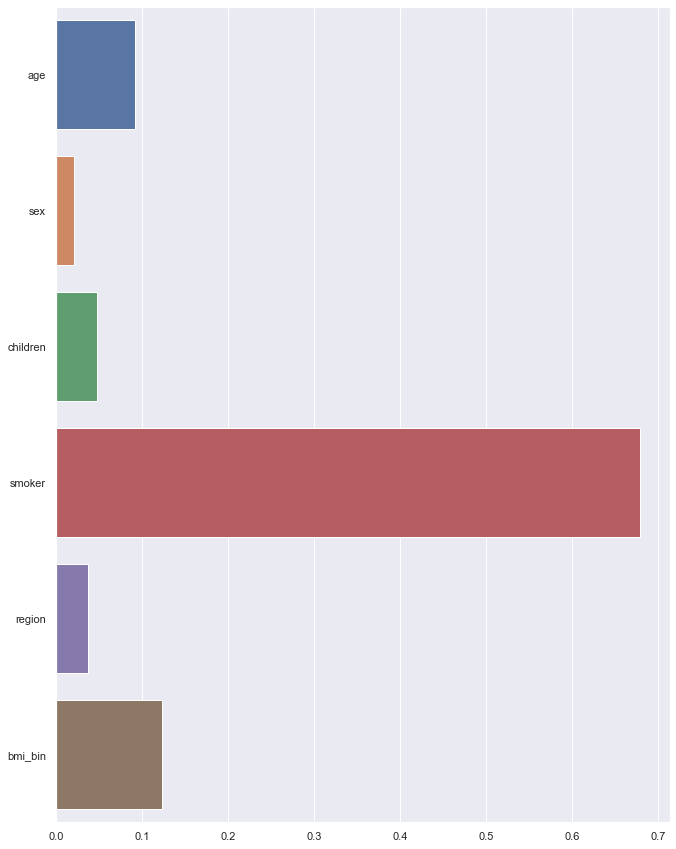

In [39]:
# feature importanceで重要度の確認
# ランダムフォレスト回帰木セット
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=80, max_features='auto')
rf.fit(X, y)
 
f, ax = plt.subplots(figsize=(11, 15))
sns.barplot(x=rf.feature_importances_, y=X.columns.values, orient='h')

In [40]:
#影響度の順番に並び替え 
org_sort = np.argsort(-rf.feature_importances_)
 
#f, ax = plt.subplots(figsize=(11, 19))
#sns.barplot(rf.feature_importances_[org_sort], y=X_train.columns.values[org_sort], orient='h')
 
X = X.iloc[:,org_sort[:3]]
test = test.iloc[:,org_sort[:3]]
 
X.head()

,smoker,bmi_bin,age
0,0,4,45
1,0,0,18
2,0,3,28
3,0,4,46
4,0,3,27


In [41]:
test.head()

,smoker,bmi_bin,age
0,0,2,28
1,0,1,22
2,1,2,38
3,0,1,22
4,1,2,47


IndexError: single positional indexer is out-of-bounds

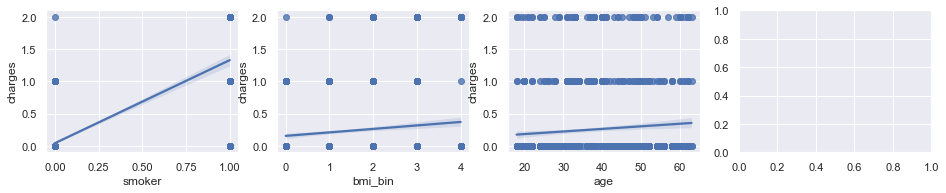

In [42]:
# 特徴量と目的変数の関係と外れ値の削除
# 目的変数と説明変数の2変量の関係を描画
fig = plt.figure(figsize=(20,12))
 
for i in range(15):
    
    #4×5のグラフを作成。
    ax = fig.add_subplot(4,5,i+1)
    #目的変数（price_range)をy軸に、説明変数をx軸にプロット
    sns.regplot(x=X.iloc[:,i], y=y)
 
plt.tight_layout()
plt.show()

In [43]:
# ライブラリのインポート
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)

# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=2)

In [44]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass', # 目的 : 多クラス分類 
        'num_class': 6, # クラス数 : 4
        'metric': {'multi_error'}, # 評価指標 : 誤り率(= 1-正答率) 
        #他には'multi_logloss'など
        'learning_rate': 0.1,
        'num_leaves': 7,
        'min_data_in_leaf': 1,
        'num_iteration': 1000, #1000回学習
        'verbose': 0
}

# モデルの学習
model = lgb.train(params, # パラメータ
            train_set=lgb_train, # トレーニングデータの指定
            valid_sets=lgb_eval, # 検証データの指定
            early_stopping_rounds=100 # 100回ごとに検証精度の改善を検討　→ 精度が改善しないなら学習を終了(過学習に陥るのを防ぐ)
               )

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラス(0 or 1 or 2)を返す)
y_pred = np.argmax(y_pred_prob, axis=1) # 一番大きい予測確率のクラスを予測クラスに


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's multi_error: 0.197222
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.197222
[3]	valid_0's multi_error: 0.197222
[4]	valid_0's multi_error: 0.144444
[5]	valid_0's multi_error: 0.119444
[6]	valid_0's multi_error: 0.0944444
[7]	valid_0's multi_error: 0.0944444
[8]	valid_0's multi_error: 0.0944444
[9]	valid_0's multi_error: 0.0888889
[10]	valid_0's multi_error: 0.0916667
[11]	valid_0's multi_error: 0.0916667
[12]	valid_0's multi_error: 0.0916667
[13]	valid_0's multi_error: 0.0916667
[14]	valid_0's multi_error: 0.0916667
[15]	valid_0's multi_error: 0.0916667
[16]	valid_0's multi_error: 0.0916667
[17]	valid_0's multi_error: 0.0916667
[18]	valid_0's multi_error: 0.0916667
[19]	valid_0's multi_error: 0.0916667
[20]	valid_0's multi_error: 0.0916667
[21]	valid_0's multi_error:

In [45]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2]})
display(df_pred_prob)

,target,target_pred
1049,0,0
476,0,0
61,2,2
910,1,1
68,2,2


,y,target0_prob,target1_prob,target2_prob
1049,0,0.939235,0.037316,0.023448
476,0,0.943527,0.033601,0.022872
61,2,0.216038,0.086604,0.697358
910,1,0.315204,0.607037,0.077759
68,2,0.211305,0.074733,0.713962


In [46]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

Acc : 0.9111111111111111


In [47]:
pred_test = model.predict(test)

# テストデータの予測 (予測クラス(0 or 1 or 2)を返す)
pred = np.argmax(pred_test, axis=1) # 一番大きい予測確率のクラスを予測クラスに

test["predict"] = pred
test.to_csv(r"C:\Users\taka5\Desktop\signate\iryo\test_lightgbm2.csv", encoding = "utf-8_sig")